# Day 2 - Decision Tree Regressor (Optional)

### This is an example of running the DecisionTreeRegressor model to complete a regression task on randomly generated data

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate some random data for modelling
np.random.seed(123)
number_of_instances = 100
predictor = np.arange(number_of_instances)
epsilon = np.random.uniform(-10,10, size=(number_of_instances,))
target = .4 * predictor + 3 + epsilon

In [2]:
# In order to use these arrays for regression modelling they need to be reshaped to 2D arrays
x = predictor.reshape(number_of_instances, 1)
y = target.reshape(number_of_instances, 1)

#### Splitting Data in test and training set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [3]:
# split data in training and test set
from sklearn.model_selection import train_test_split
# create training and testing vars
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 1) (80, 1) (20, 1) (20, 1)


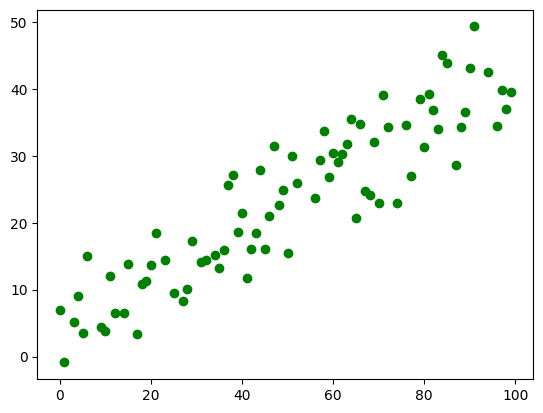

In [4]:
# plot data 
plt.scatter(x_train, y_train,  color='green')
plt.show()

#### Model Development and Prediction
First, import the Linear Regression module.
Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

The linear regression model takes the form: y = β0 + β1*x + ε, where Beta are the regression coefficients we want to find and epsilon is the error that we want to minimise.

In [5]:
from sklearn.tree import DecisionTreeRegressor
# Create object that stands for Linear regression
model = DecisionTreeRegressor()
# Fit linear regression model
model.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [6]:
# Generate predictions
y_pred = model.predict(x_test)

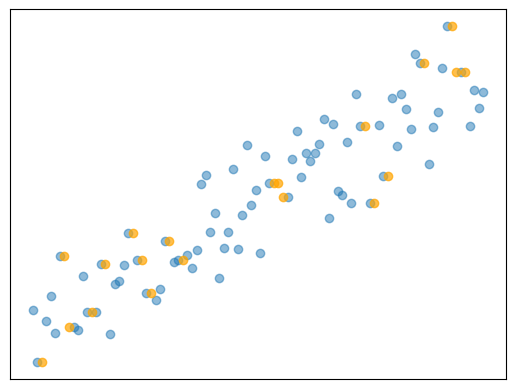

In [7]:
# Plot outputs
plt.scatter(x_train, y_train, color='tab:blue',  alpha = 0.5)
plt.scatter(x_test, y_pred, color='orange', alpha = 0.7)

plt.xticks(())
plt.yticks(())

plt.show()

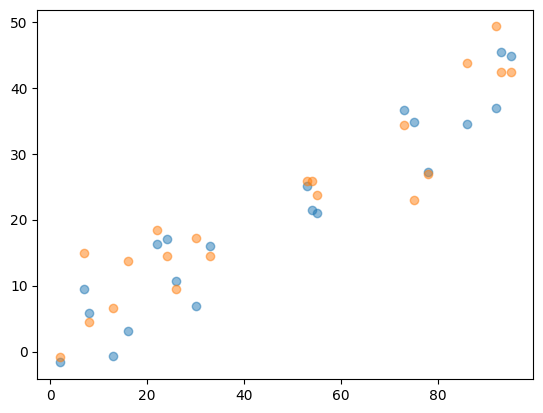

In [8]:
plt.scatter(x_test, y_test, alpha = 0.5)
plt.scatter(x_test, y_pred, alpha = 0.5)
plt.show()

In [9]:
# You can check the differences between results
y_pred = y_pred.reshape(y_test.shape)
np.concatenate([y_pred, y_test], axis = 1)

array([[ 9.45917828, 10.63577311],
       [43.83339994, 34.54795133],
       [-0.8772133 , -1.66297093],
       [23.74044422, 21.08241578],
       [22.92258413, 34.88863759],
       [42.46353833, 45.45095628],
       [13.75990811,  3.04983461],
       [34.34497944, 36.66832716],
       [25.86120257, 21.45527668],
       [42.46353833, 44.83403597],
       [25.86120257, 25.10136013],
       [49.30716964, 36.91829731],
       [26.97919288, 27.2614103 ],
       [ 6.57144489, -0.60644207],
       [15.01528397,  9.49659477],
       [17.21952248,  6.8420988 ],
       [18.38863588, 16.2891065 ],
       [14.42047021, 17.04886765],
       [14.41725527, 16.07370195],
       [ 4.44235036,  5.81863803]])

In [10]:
from sklearn.metrics import r2_score
# Check R^2
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.8178015311577391


#### To get more details about model parameters please check sklearn [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

## Your task: Decision Tree Regressor model for Advertising data

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.

### Build a prediction model

#### 1. Download (if it's not already downloaded) and load advertising data.

In [4]:
import pandas as pd
df = pd.read_csv("advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### 2. Split the dataset in labels and features.

In [5]:
X = df.drop('Sales', axis = 1)
y = df['Sales']

#### 3. Look at data and visualize them. Write what you observe.

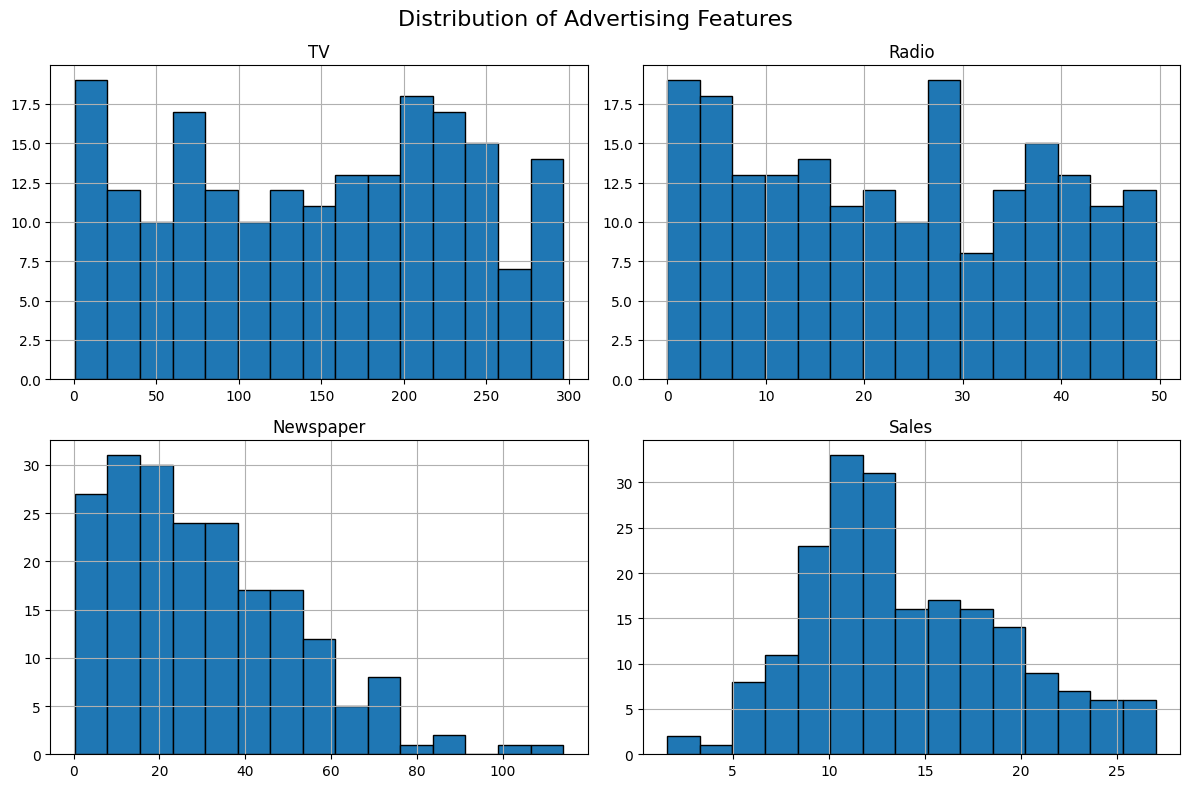

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Distribution of Advertising Features", fontsize=16)
plt.tight_layout()
plt.show()


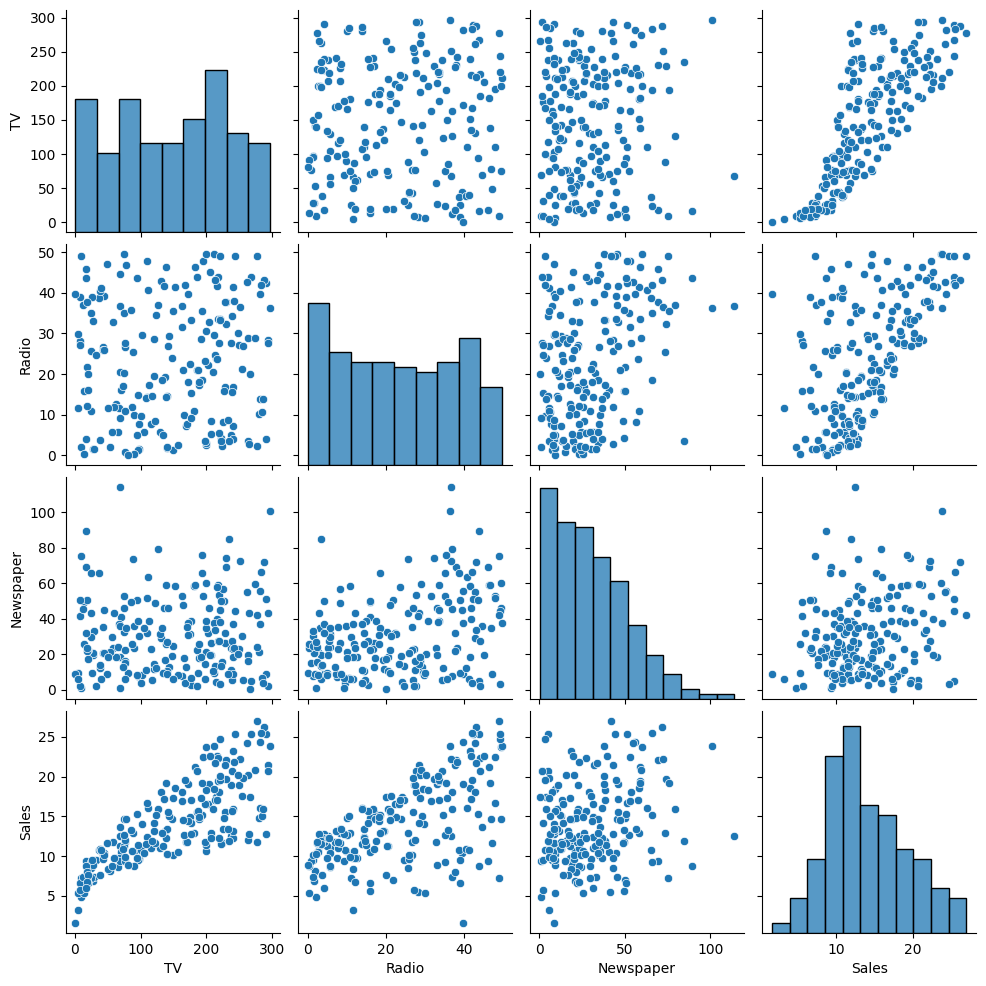

In [8]:
sns.pairplot(df)
plt.show()


There is strong correlation between Sales and TV advertising, average corr between Sales and Radio, and almost no corr between Sales and Newspaper.

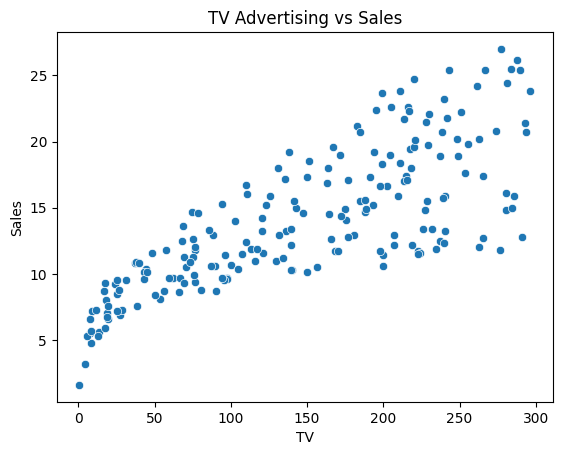

In [9]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV Advertising vs Sales")
plt.show()


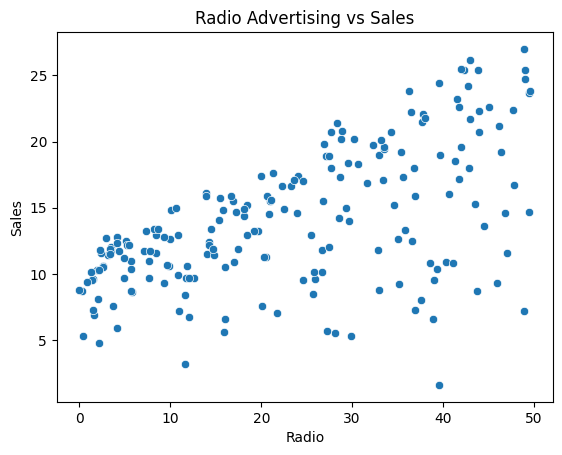

In [11]:
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Radio Advertising vs Sales")
plt.show()


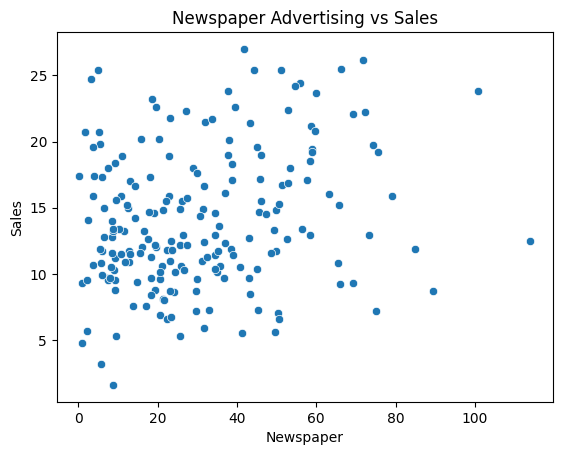

In [12]:
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Newspaper Advertising vs Sales")
plt.show()


The visualizations clearly indicate that TV advertising is the most influential factor in driving product sales, followed by Radio. Newspaper advertising appears to have little to no meaningful impact. These insights help justify why a regression model should rely more heavily on TV and Radio features.

Visually linearity is notisable in TV and Radio plots. Newspaper data is quite scatterd across the area.

#### 4. Split the dataset in training and test set.

In [10]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17
)

#### 5. Build Decision Tree Regressor model. Use 'Sales' as target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=17)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("First 10 Predictions:", y_pred[:10])


First 10 Predictions: [22.6 12.5  5.5 18.  12.6 10.5  9.3 14.9 12.  10.5]


#### 6. Provide predictions for test set.

In [ ]:
y_pred = dt_reg.predict(X_test)

print("Predictions for Test Set:")
print(y_pred)


Predictions for Test Set:
[22.6 12.5  5.5 18.  12.6 10.5  9.3 14.9 12.  10.5 11.9 17.1 10.1 17.
 24.7  6.7  5.6 13.6 17.2 14.9 12.9  9.4 17.  17.6 11.9 11.3  8.1  9.6
 21.7 16.7 12.   3.2 14.9 20.8 12.6  4.8 17.2 11.  10.6 18.5]


In [15]:
# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual Sales": y_test.values,
    "Predicted Sales": y_pred
})

print(comparison.head(10))


   Actual Sales  Predicted Sales
0          22.1             22.6
1          13.2             12.5
2           7.3              5.5
3          20.2             18.0
4          12.8             12.6
5          11.3             10.5
6           8.7              9.3
7          15.2             14.9
8          11.8             12.0
9          10.1             10.5


#### 7. Evaluate the model (calculate R^2, MAE, MSE, RMSE).

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 0.8225000000000001
MSE: 1.1242500000000002
RMSE: 1.0603065594440129
R² Score: 0.9570299856073862


# CONCLUSION
Compare the results of exercise 1.1 and 1.2

Answer the folowing questions:
- Which model did better on *Advertising.csv* - LinearRegression or DecisionTreeRegressor? 
- How did you evalutate which was better?
- Why did this model do better?

DecisionTreeRegressor performed better than LinearRegression
The Advertising dataset contains nonlinear relationships
    TV and Radio have strong linear trends, but
    Newspaper and interactions between features introduce nonlinear patterns.
    A Decision Tree can capture these nonlinearities, while Linear Regression cannot.
Decision Trees adapt to local patterns
Dataset is small
R² score of 0.957 indicates the tree captured the underlying patterns effectively.

Linear Regression assumes - Linearity, No interactions, No complex feature relationships

The Decision Tree has lower MAE, MSE, and RMSE, meaning its predictions are closer to the actual sales values.
The Decision Tree has a higher R² score (0.957 vs 0.897), meaning it explains more variance in Sales.
Lower error + higher R² = better predictive performance.

Based on the metrics, the Decision Tree Regressor is the superior model for predicting Sales in the Advertising dataset. It achieved lower prediction errors and a higher R² score, indicating stronger accuracy and better ability to capture the underlying relationships between advertising budgets and sales
